# Plots of different features we may want to use to predict HOs

#### Imports

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Plots of number of "pings" on registered time stamps

#### G5 data set

In [103]:
many_points = 'Interactivity_gaming_4G5G_TIM_Driving_Palasport_to_Via_Appia_End_No_Flight_Mode'

df = pd.read_csv('datasets/Op1_merged.csv')
df = df.iloc[: , 1:]
df_one_campaign = df.loc[df['campaign'] == many_points]

##

time = pd.to_datetime(df_one_campaign['Timestamp'])
time_df = pd.DataFrame(time, columns=['Timestamp'])
time_df['Count'] = 1
time_df.set_index('Timestamp', inplace=True)
time_count = time_df.resample('100ms').sum().fillna(0)

##

mode_df = df_one_campaign['Mode'].to_numpy()
ho_to_5g = [0]
ho_to_4g = [0]
for i in range(len(mode_df) - 1):
    if mode_df[i] == mode_df[i+1]:
        ho_to_5g.append(0)
        ho_to_4g.append(0)
    elif mode_df[i] == 'LTE' and mode_df[i+1] == 'DC':
        ho_to_5g.append(12)
        ho_to_4g.append(0)
    elif mode_df[i] == 'DC' and mode_df[i+1] == 'LTE':
        ho_to_5g.append(0)
        ho_to_4g.append(10)
ho_5g_df = pd.DataFrame(time, columns=['Timestamp'])
ho_5g_df['HO_to_5g'] = ho_to_5g
ho_4g_df = pd.DataFrame(time, columns=['Timestamp'])
ho_4g_df['HO_to_4g'] = ho_to_4g
ho_5g_df.set_index('Timestamp', inplace=True)
ho_4g_df.set_index('Timestamp', inplace=True)
ho_5g_count = ho_5g_df.resample('2s').sum().fillna(0)
ho_4g_count = ho_4g_df.resample('2s').sum().fillna(0)
filtered_ho_5g_count = ho_5g_count[ho_5g_count['HO_to_5g'] > 0]
filtered_ho_4g_count = ho_4g_count[ho_4g_count['HO_to_4g'] > 0]

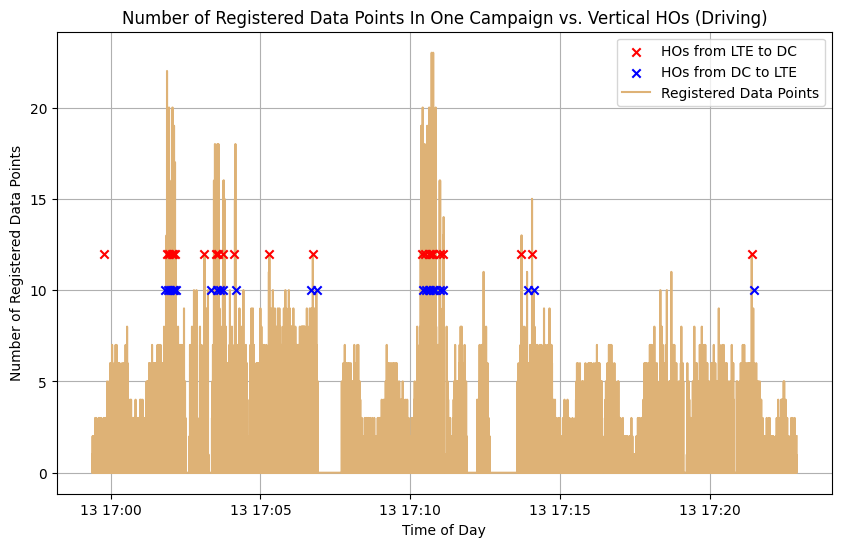

In [104]:
orange = '#DEB276'

plt.figure(figsize=(10, 6))
plt.scatter(filtered_ho_5g_count.index, filtered_ho_5g_count['HO_to_5g'], marker='x', color='r', zorder=5, label='HOs from LTE to DC')
plt.scatter(filtered_ho_4g_count.index, filtered_ho_4g_count['HO_to_4g'], marker='x', color='b', zorder=5, label='HOs from DC to LTE')
plt.plot(time_count.index, time_count['Count'], linestyle='-', color=orange, label='Registered Data Points')
plt.xlabel('Time of Day')
plt.ylabel('Number of Registered Data Points')
plt.title('Number of Registered Data Points In One Campaign vs. Vertical HOs (Driving)')
plt.grid(True)
plt.legend()
plt.show()

In [105]:
many_points = 'Ping_UNIDATA_4G5G_TIM_Walking_Tuscolana_Stat_Appia_Part_2'

df = pd.read_csv('datasets/Op1_merged.csv')
df_one_campaign = df.loc[df['campaign'] == many_points]

##

time = pd.to_datetime(df_one_campaign['Timestamp'])
time_df = pd.DataFrame(time, columns=['Timestamp'])
time_df['Count'] = 1
time_df.set_index('Timestamp', inplace=True)
time_count = time_df.resample('100ms').sum().fillna(0)

##

mode_df = df_one_campaign['Mode'].to_numpy()
ho_to_5g = [0]
ho_to_4g = [0]
for i in range(len(mode_df) - 1):
    if mode_df[i] == mode_df[i+1]:
        ho_to_5g.append(0)
        ho_to_4g.append(0)
    elif mode_df[i] == 'LTE' and mode_df[i+1] == 'DC':
        ho_to_5g.append(8)
        ho_to_4g.append(0)
    elif mode_df[i] == 'DC' and mode_df[i+1] == 'LTE':
        ho_to_5g.append(0)
        ho_to_4g.append(6)
ho_5g_df = pd.DataFrame(time, columns=['Timestamp'])
ho_5g_df['HO_to_5g'] = ho_to_5g
ho_4g_df = pd.DataFrame(time, columns=['Timestamp'])
ho_4g_df['HO_to_4g'] = ho_to_4g
ho_5g_df.set_index('Timestamp', inplace=True)
ho_4g_df.set_index('Timestamp', inplace=True)
ho_5g_count = ho_5g_df.resample('2s').sum().fillna(0)
ho_4g_count = ho_4g_df.resample('2s').sum().fillna(0)
filtered_ho_5g_count = ho_5g_count[ho_5g_count['HO_to_5g'] > 0]
filtered_ho_4g_count = ho_4g_count[ho_4g_count['HO_to_4g'] > 0]

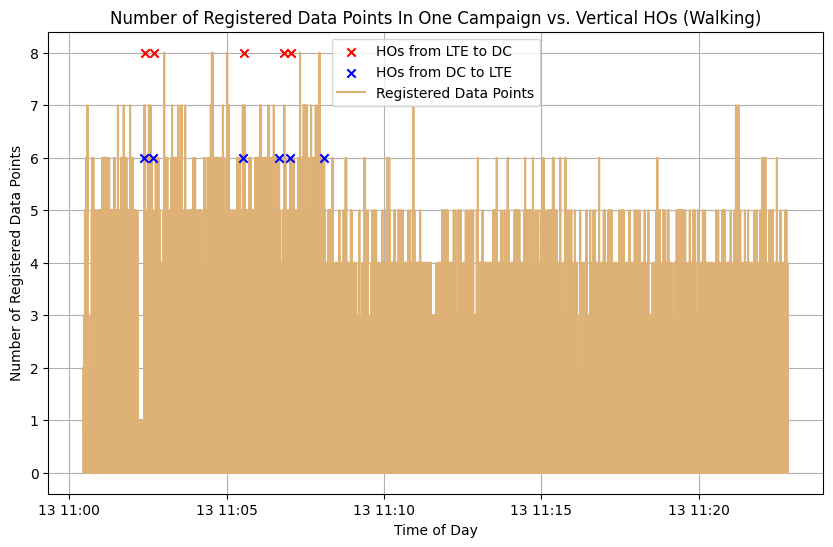

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_ho_5g_count.index, filtered_ho_5g_count['HO_to_5g'], marker='x', color='r', zorder=5, label='HOs from LTE to DC')
plt.scatter(filtered_ho_4g_count.index, filtered_ho_4g_count['HO_to_4g'], marker='x', color='b', zorder=5, label='HOs from DC to LTE')
plt.plot(time_count.index, time_count['Count'], linestyle='-', color=orange, label='Registered Data Points')
plt.xlabel('Time of Day')
plt.ylabel('Number of Registered Data Points')
plt.title('Number of Registered Data Points In One Campaign vs. Vertical HOs (Walking)')
plt.grid(True)
plt.legend()
plt.show()

<Axes: >

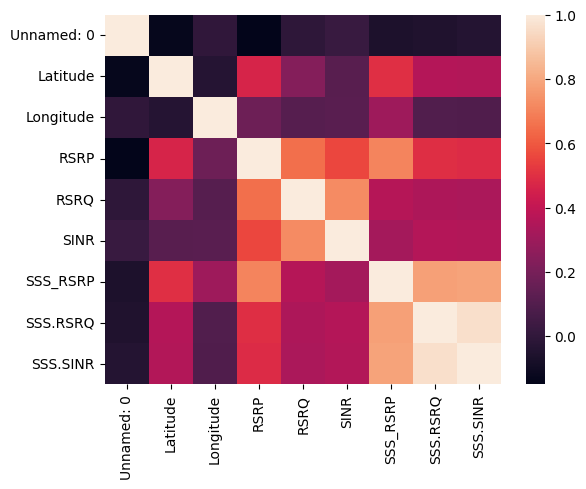

In [107]:
df_numeric_features_only = df.select_dtypes(include=np.number)
corr = df_numeric_features_only.corr(method = 'spearman')
sns.heatmap(corr)